# IMPORTS

In [1]:
import collections
import matplotlib.pyplot as plt
from collections import defaultdict
import collections
import numpy as np
from statistics import mean 
import time
import networkx as nx
from scipy import stats
from sklearn import preprocessing

# GRAPH READER

In [2]:
"""Benchmark dataset reader."""
ts = time.time()
from littleballoffur.data_reader import GraphReader

reader = GraphReader('wikipedia')

graph = reader.get_graph()
time.time() - ts


0.3249168395996094

In [3]:
print(len(graph.nodes()))

11631


# SAMPLING

Random Walk Sampler

In [4]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import RandomWalkSampler

sampler = RandomWalkSampler(2326)

rw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(rw_graph.nodes))
time.time() - ts

original graph nodes 11631
after sampling graph nodes 2326


0.04008889198303223

Non Back Tracking Random Walk

In [5]:
ts = time.time()
"""Non back-tracking random walk sampler example"""

from littleballoffur.exploration_sampling import NonBackTrackingRandomWalkSampler

sampler = NonBackTrackingRandomWalkSampler(2326)

nrw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(nrw_graph.nodes))
time.time() - ts

original graph nodes 11631
after sampling graph nodes 2326


0.041330814361572266

Forest Fire Sampler

In [6]:
ts = time.time()
"""Forest fire sampler example"""

from littleballoffur.exploration_sampling import ForestFireSampler

sampler = ForestFireSampler(2326)

ff_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(ff_graph.nodes))
time.time() - ts

original graph nodes 11631
after sampling graph nodes 2326


0.07720589637756348

Spiky Sampler

In [7]:
ts = time.time()
"""Shortest path sampler example"""

from littleballoffur.exploration_sampling import SpikyBallSampler

sampler = SpikyBallSampler(2326)

spiky_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(spiky_graph.nodes))
time.time() - ts

original graph nodes 11631
after sampling graph nodes 2326


0.2880399227142334

Frontier Sampler

In [8]:
ts = time.time()
"""Snow ball sampler example"""

from littleballoffur.exploration_sampling import FrontierSampler

sampler = FrontierSampler(number_of_nodes = 2326)

frontier_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(frontier_graph.nodes))
time.time() - ts

original graph nodes 11631
after sampling graph nodes 2326


0.17744898796081543

# STATISTICS

In [9]:
ts = time.time()
#Original graph
print('Average Clustering - Original: ',nx.average_clustering(graph))

print('-------------------------------------------------------------------')
#Random Walk
print('Average Clustering - Random Walk: ',nx.average_clustering(rw_graph))

#Non Back tracking Random Walk
print('Average Clustering - Non back Tracking Random Walk: ',nx.average_clustering(nrw_graph))

#Forest Fire
print('Average Clustering - Forest Fire: ',nx.average_clustering(ff_graph))

#Shortest Path
print('Average Clustering - Shortest Path: ',nx.average_clustering(spiky_graph))

#Snow Ball
print('Average Clustering - Snow Ball: ',nx.average_clustering(frontier_graph))
time.time() - ts



Average Clustering - Original:  0.33646949494243905
-------------------------------------------------------------------
Average Clustering - Random Walk:  0.3081407786609363
Average Clustering - Non back Tracking Random Walk:  0.32040518555051806
Average Clustering - Forest Fire:  0.31353435025099013
Average Clustering - Shortest Path:  0.35316077997731943
Average Clustering - Snow Ball:  0.017508521465665883


34.635268211364746

In [10]:
ts = time.time()
#Original graph
print('Triangles Percentage - Original: ',(sum(nx.triangles(graph).values()) / 3)/len(graph.nodes))

print('-------------------------------------------------------------------')
#Random Walk
print('Triangles Percentage- Random Walk: ',(sum(nx.triangles(rw_graph).values()) / 3)/len(rw_graph.nodes))

#Non Back tracking Random Walk
print('Triangles Percentage - Non back Tracking Random Walk: ',(sum(nx.triangles(nrw_graph).values()) / 3)/len(nrw_graph.nodes))

#Forest Fire
print('Triangles Percentage - Forest Fire: ',(sum(nx.triangles(ff_graph).values()) / 3)/len(ff_graph.nodes))

#Shortest Path
print('Triangles Percentage - Shortest Path: ',(sum(nx.triangles(spiky_graph).values()) / 3)/len(spiky_graph.nodes))

#Snow Ball
print('Triangles Percentage - Snow Ball: ',(sum(nx.triangles(frontier_graph).values()) / 3)/len(frontier_graph.nodes))

time.time() - ts



Triangles Percentage - Original:  53.60098013928295
-------------------------------------------------------------------
Triangles Percentage- Random Walk:  83.03955288048151
Triangles Percentage - Non back Tracking Random Walk:  71.70335339638865
Triangles Percentage - Forest Fire:  82.8542562338779
Triangles Percentage - Shortest Path:  35.38005159071367
Triangles Percentage - Snow Ball:  0.040842648323301804


34.38983488082886

In [11]:
ts = time.time()
#Original graph
print('Size of largest connected component - Original: ',len(max(nx.connected_components(graph))))

print('-------------------------------------------------------------------')
#Random Walk
print('Size of largest connected component- Random Walk: ',len(max(nx.connected_components(rw_graph))))

#Non Back tracking Random Walk
print('Size of largest connected component - Non back Tracking Random Walk: ',len(max(nx.connected_components(nrw_graph))))

#Forest Fire
print('Size of largest connected component - Forest Fire: ',len(max(nx.connected_components(ff_graph))))

#Shortest Path
print('Size of largest connected component - Shortest Path: ',len(max(nx.connected_components(spiky_graph))))

# #Snow Ball
print('Size of largest connected component - Snow Ball: ',len(max(nx.connected_components(frontier_graph))))
time.time() - ts


Size of largest connected component - Original:  11631
-------------------------------------------------------------------
Size of largest connected component- Random Walk:  2326
Size of largest connected component - Non back Tracking Random Walk:  2326
Size of largest connected component - Forest Fire:  2326
Size of largest connected component - Shortest Path:  2310
Size of largest connected component - Snow Ball:  2326


0.18738293647766113

In [12]:
print((nx.number_connected_components(graph)))

1


In [13]:
ts = time.time()
#Original graph
print('Degree Assortativity Coefficient - Original: ',nx.degree_assortativity_coefficient(graph))

print('-------------------------------------------------------------------')

#Random Walk
print('Degree Assortativity Coefficient - Random Walk: ',nx.degree_assortativity_coefficient(rw_graph))

#Non Back tracking Random Walk
print('Degree Assortativity Coefficient - Non back Tracking Random Walk: ',nx.degree_assortativity_coefficient(nrw_graph))

#Forest Fire
print('Degree Assortativity Coefficient - Forest Fire: ',nx.degree_assortativity_coefficient(ff_graph))

#Shortest Path
print('Degree Assortativity Coefficient - Shortest Path: ',nx.degree_assortativity_coefficient(spiky_graph))

#Snow Ball
print('Degree Assortativity Coefficient - Snow Ball: ',nx.degree_assortativity_coefficient(frontier_graph))
time.time() - ts



Degree Assortativity Coefficient - Original:  -0.2765434719795714
-------------------------------------------------------------------
Degree Assortativity Coefficient - Random Walk:  -0.35865351921595295
Degree Assortativity Coefficient - Non back Tracking Random Walk:  -0.3485397951120158
Degree Assortativity Coefficient - Forest Fire:  -0.3144085464759736
Degree Assortativity Coefficient - Shortest Path:  -0.25116958273406115
Degree Assortativity Coefficient - Snow Ball:  -0.26317004908866143


27.517834901809692

# MATCHING PATTERNS - PLOTS

In [14]:
def degree_distributon(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    return deg,cnt

In [15]:
ts = time.time()
#Original 
deg,cnt = degree_distributon(graph)

#Random Walk
deg1,cnt1 = degree_distributon(rw_graph)

#Non Back tracking Random Walk
deg2,cnt2 = degree_distributon(nrw_graph)

#Forest Fire
deg3,cnt3 = degree_distributon(ff_graph)

#Shortest Path
deg4,cnt4 = degree_distributon(spiky_graph)

#Snow Ball
deg5,cnt5 = degree_distributon(frontier_graph)
time.time() - ts

0.195512056350708

Text(0.5, 0, 'Degree')

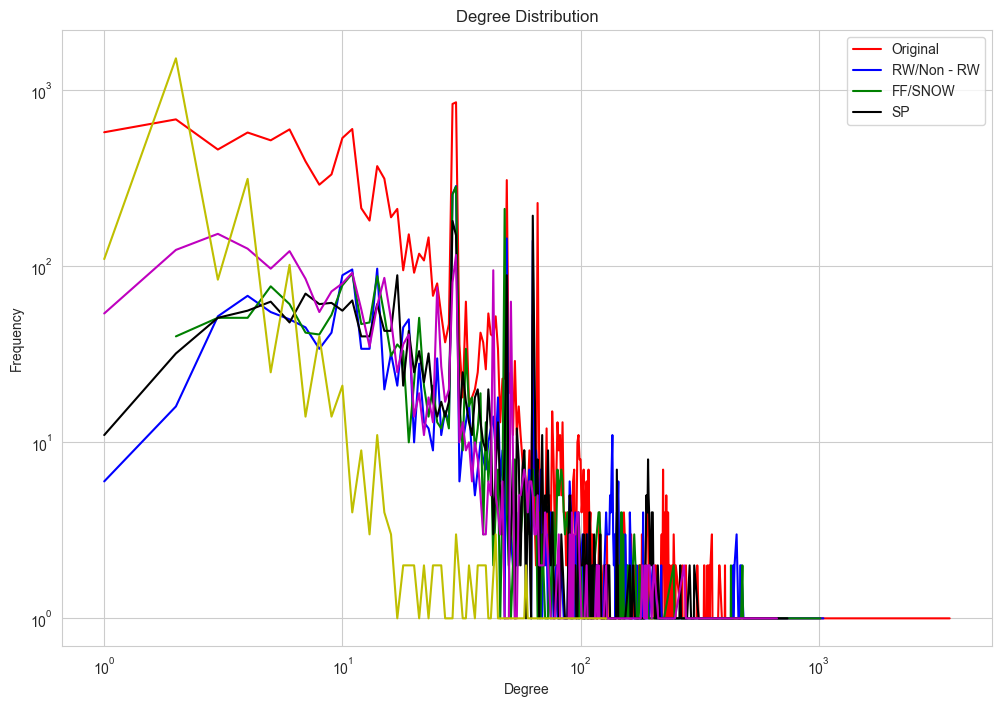

In [16]:
plt.figure(figsize=(12, 8))
plt.loglog(deg, cnt, 'r-', label='original')
plt.loglog(deg1,cnt1, 'b-', label='RW')
plt.loglog(deg2,cnt2,'g-', label='Non - RW')
plt.loglog(deg3, cnt3, 'k-', label='FF')
plt.loglog(deg4, cnt4, 'm-', label='SP')
plt.loglog(deg5, cnt5, 'y-', label='SNOW')
plt.legend(['Original','RW/Non - RW','FF/SNOW','SP'])
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.yscale('log')
# plt.xscale('log')
plt.xlabel("Degree")

In [17]:
# def degree_clustering(G):
#    degree = G.degree()
#    degree_list,degrees,clustering_list = [],[],[]
#    for n,m in degree:
#       degree_list.append(m)
#    degree_list
#    degree_np = np.asarray(sorted(degree_list))
  

#    for k in range(len(np.unique(degree_np))):
#       nodes_degree_k = ([u for u in G.nodes() if G.degree(u) == k])
#       if len(nodes_degree_k) != 0:
#          clustering_coeff = nx.average_clustering(G, nodes_degree_k)
#          degrees.append(k)
#          clustering_list.append(clustering_coeff)
#       nodes_degree_k = []
         
#    return degrees,clustering_list 


def degree_clustering(original, sample):
   degree = sample.degree()
   degree_list,degrees,clustering_list,kstest = [],[],[],[]
   
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      sample_nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      if len(sample_nodes_degree_k) != 0:
        sample_clustering_coef = nx.clustering(sample, sample_nodes_degree_k)
        original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
        original_clustering_coef = nx.clustering(original, original_nodes_degree_k)
        avg_clustering_coeff = nx.average_clustering(sample, sample_nodes_degree_k)

        original_clustering_coef = np.fromiter(original_clustering_coef.values(), dtype=float)
        
        sample_clustering_coef = np.fromiter(sample_clustering_coef.values(), dtype=float)
        
        if len(original_clustering_coef) != 0:
         if len(sample_clustering_coef) != 0:
            ks_test = stats.ks_2samp(preprocessing.scale(original_clustering_coef), preprocessing.scale(sample_clustering_coef))[0]

            kstest.append(ks_test)
        degrees.append(k)
        clustering_list.append(avg_clustering_coeff)
      nodes_degree_k = []
    
   avg_kstest = np.average(kstest)
         
   return degrees,clustering_list,avg_kstest 

In [18]:
ts = time.time()
degrees,clustering_list,avg_kstest = degree_clustering(graph,graph)
degrees1,clustering_list1,avg_kstest1 = degree_clustering(graph,rw_graph)
degrees2,clustering_list2,avg_kstest2 = degree_clustering(graph,nrw_graph)
degrees3,clustering_list3,avg_kstest3 = degree_clustering(graph,ff_graph)
degrees4,clustering_list4,avg_kstest4 = degree_clustering(graph,spiky_graph)
degrees5,clustering_list5,avg_kstest5 = degree_clustering(graph,frontier_graph)
time.time() - ts


/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


137.31759786605835

In [19]:
# plt.figure(figsize=(12, 8))
# # plt.scatter(degrees, clustering_list, color='red')
# # plt.scatter(degrees1, clustering_list1, color='blue')
# plt.plot(degrees[1:], clustering_list[1:], color='red')
# # plt.plot(degrees1[1:], clustering_list1[1:], color='blue')
# plt.plot(degrees2[1:], clustering_list2[1:], color='green')
# # plt.plot(degrees3[1:],clustering_list3[1:],color='black' )
# plt.plot(degrees4[1:],clustering_list4[1:],'m-',)
# plt.plot(degrees5[1:],clustering_list5[1:], 'y-')
# # plt.loglog(deg4, cnt4, 'm-', label='SP')
# # plt.loglog(deg5, cnt5, 'y-', label='SNOW')
# plt.legend(['Original','RW/Non - RW','FF/SNOW','SP'])
# plt.title("Degree Distribution")
# plt.ylabel("Frequency")
# # plt.xscale('log')
# # plt.yscale('log')
# plt.xlabel("Degree")

Text(0.5, 0, 'Node Degree')

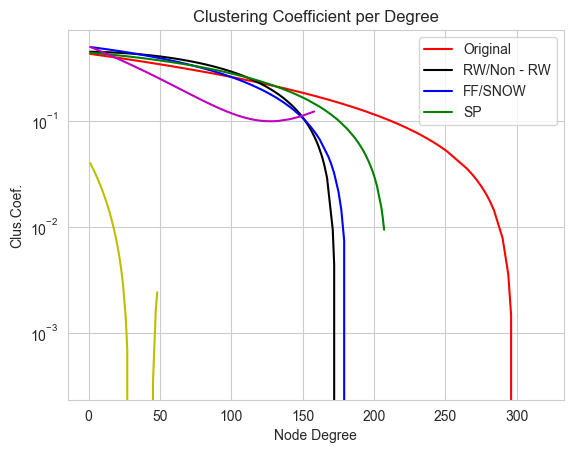

In [20]:
z = np.polyfit(degrees, clustering_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, clustering_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"black")

z = np.polyfit(degrees2, clustering_list2,2)
p = np.poly1d(z)
plt.plot(degrees2,p(degrees2),"blue")

z = np.polyfit(degrees3, clustering_list3,2)
p = np.poly1d(z)
plt.plot(degrees3,p(degrees3),"g")

z = np.polyfit(degrees4, clustering_list4,2)
p = np.poly1d(z)
plt.plot(degrees4,p(degrees4),"m")

z = np.polyfit(degrees5, clustering_list5,2)
p = np.poly1d(z)
plt.plot(degrees5,p(degrees5),"y")

plt.legend(['Original','RW/Non - RW','FF/SNOW','SP'])
plt.title("Clustering Coefficient per Degree")
plt.ylabel("Clus.Coef.")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

In [21]:
# def average_degree_neighbor(G):
#    degree = G.degree()
#    degree_list,degrees,neighbor_list = [],[],[]
#    for n,m in degree:
#       degree_list.append(m)
#    degree_list
#    degree_np = np.asarray(sorted(degree_list))
  

#    for k in range(len(np.unique(degree_np))):
#       nodes_degree_k = ([u for u in G.nodes() if G.degree(u) == k])
#       # print(nodes_degree_k)
#       if len(nodes_degree_k) != 0:
#          aver_neighbor_deg = nx.average_neighbor_degree( G , nodes = nodes_degree_k)
#          list_avg = mean(aver_neighbor_deg.values()) 
#          degrees.append(k)
#          neighbor_list.append(list_avg)
#       nodes_degree_k = []
         
#    return degrees,neighbor_list


def average_degree_neighbor(original, sample):
   degree = sample.degree()
   degree_list,degrees,neighbor_list,kstest = [],[],[],[]
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      # print(nodes_degree_k)
      if len(nodes_degree_k) != 0:
         sample_aver_neighbor_deg = nx.average_neighbor_degree( sample , nodes = nodes_degree_k)

         original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
         original_aver_neighbor_deg = nx.average_neighbor_degree( original , nodes = original_nodes_degree_k)


         original_avg_neighbor_degree = np.fromiter(original_aver_neighbor_deg.values(), dtype=float)
         sample_aver_neighbor_deg = np.fromiter(sample_aver_neighbor_deg.values(), dtype=float)

         if len(original_avg_neighbor_degree) != 0:
            if len(sample_aver_neighbor_deg) != 0:
               ks_test = stats.ks_2samp(preprocessing.scale(original_avg_neighbor_degree), preprocessing.scale(sample_aver_neighbor_deg))[0]
         
               kstest.append(ks_test)

         list_avg = mean(sample_aver_neighbor_deg) 
         degrees.append(k)
         neighbor_list.append(list_avg)
      nodes_degree_k = []
   
   kstest_neighbor_degree = np.average(kstest)
         
   return degrees,neighbor_list,kstest_neighbor_degree

In [22]:
ts = time.time()
degrees,neighbor_list,kstest_neighbor_degree = average_degree_neighbor(graph,graph)
degrees1,neighbor_list1,kstest_neighbor_degree1 = average_degree_neighbor(graph,rw_graph)
degrees2,neighbor_list2,kstest_neighbor_degree2 = average_degree_neighbor(graph,nrw_graph)
degrees3,neighbor_list3,kstest_neighbor_degree3 = average_degree_neighbor(graph,ff_graph)
degrees4,neighbor_list4,kstest_neighbor_degree4 = average_degree_neighbor(graph,spiky_graph)
degrees5,neighbor_list5,kstest_neighbor_degree5 = average_degree_neighbor(graph,frontier_graph)
time.time() - ts

/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/Users/achris/miniconda3/envs/snacs/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


59.31854295730591

Text(0.5, 0, 'Node Degree')

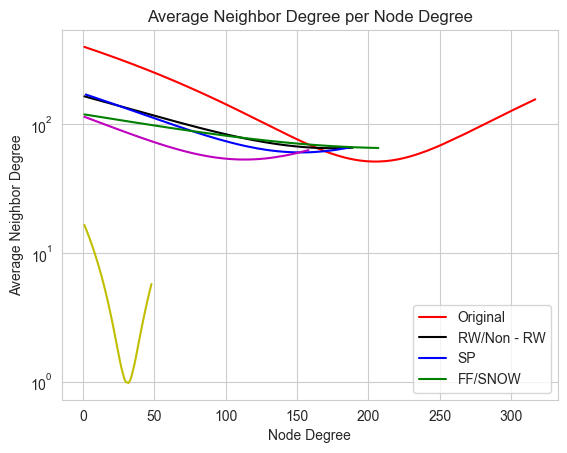

In [23]:
# plt.figure(figsize=(12, 8))

# plt.plot(degrees, neighbor_list, color='red')
# plt.plot(degrees1, neighbor_list1, color='blue')
# plt.plot(degrees2, neighbor_list2, color='green')
# plt.plot(degrees3,neighbor_list3,color='black' )
# plt.plot(degrees4,neighbor_list4,'m-',)
# plt.plot(degrees5,neighbor_list5, 'y-')


z = np.polyfit(degrees, neighbor_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, neighbor_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"black")

z = np.polyfit(degrees2, neighbor_list2,2)
p = np.poly1d(z)
plt.plot(degrees2,p(degrees2),"blue")

z = np.polyfit(degrees3, neighbor_list3,2)
p = np.poly1d(z)
plt.plot(degrees3,p(degrees3),"g")

z = np.polyfit(degrees4, neighbor_list4,2)
p = np.poly1d(z)
plt.plot(degrees4,p(degrees4),"m")

z = np.polyfit(degrees5, neighbor_list5,2)
p = np.poly1d(z)
plt.plot(degrees5,p(degrees5),"y")

plt.legend(['Original','RW/Non - RW','SP', 'FF/SNOW'])
plt.title("Average Neighbor Degree per Node Degree")
plt.ylabel("Average Neighbor Degree")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

# KOLMOGOROV-SMIRNOV TEST

KS-TEST FOR DEGREE DISTRIBUTION

In [24]:
#SCALING THE DATA

std_deg = preprocessing.scale(deg)
std_deg1 = preprocessing.scale(deg1)
std_deg2 = preprocessing.scale(deg2)
std_deg3 = preprocessing.scale(deg3)
std_deg4 = preprocessing.scale(deg4)
std_deg5 = preprocessing.scale(deg5)

In [25]:
print("RW ---> ", stats.ks_2samp(std_deg, std_deg1))
print("N-RW ---> ", stats.ks_2samp(std_deg, std_deg2))
print("FF ---> ", stats.ks_2samp(std_deg, std_deg3))
print("SP ---> ", stats.ks_2samp(std_deg, std_deg4))
print("SNOW ---> ", stats.ks_2samp(std_deg, std_deg5))

RW --->  KstestResult(statistic=0.23711340206185566, pvalue=1.8650198522152727e-06)
N-RW --->  KstestResult(statistic=0.2356020942408377, pvalue=2.5309612385788905e-06)
FF --->  KstestResult(statistic=0.27884615384615385, pvalue=3.896453927450472e-09)
SP --->  KstestResult(statistic=0.2625, pvalue=6.733450658270865e-07)
SNOW --->  KstestResult(statistic=0.2875, pvalue=0.001182148468477814)


KS-TEST FOR AVERAGE CLUSTERING COEFFICIENT PER NODE DEGREE

In [26]:
print("RW ---> ", avg_kstest1)
print("N-RW ---> ", avg_kstest2)
print("FF ---> ", avg_kstest3)
print("SP ---> ", avg_kstest4)
print("SNOW ---> ",avg_kstest5)

RW --->  0.4074683662834402
N-RW --->  0.39102211633582745
FF --->  0.3745793049899036
SP --->  0.3891948532423507
SNOW --->  0.5518925068606118


KS-TEST FOR AVERAGE NEIGHBORHOOD DEGREE PER NODE DEGREE

In [27]:
print("RW ---> ", kstest_neighbor_degree1)
print("N-RW ---> ", kstest_neighbor_degree2)
print("FF ---> ", kstest_neighbor_degree3)
print("SP ---> ", kstest_neighbor_degree4)
print("SNOW ---> ",kstest_neighbor_degree5)

RW --->  0.41190612064416077
N-RW --->  0.3848350002794103
FF --->  0.3605196537267066
SP --->  0.3901896018152844
SNOW --->  0.41108804447073
